In [2]:
!pip install tf-keras-vis

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.1/52.1 kB 1.7 MB/s eta 0:00:00


In [9]:
%reload_ext autoreload
%autoreload 2

import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

import tensorflow as tf
from tf_keras_vis.utils import num_of_gpus

from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.applications.vgg16 import preprocess_input

_, gpus = num_of_gpus()
print('{} GPUs'.format(gpus))

Tensorflow recognized 1 GPUs


In [4]:
from tensorflow.keras.applications.vgg16 import VGG16 as Model

model = Model(weights='imagenet', include_top=True)
model.summary()

553467096/553467096 [==============================] - 6s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                            

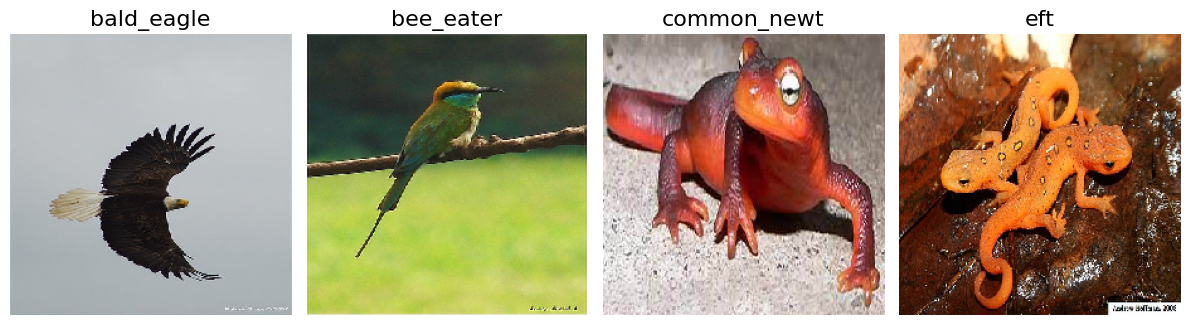

In [22]:
image_titles = ['bald_eagle', 'bee_eater', 'common_newt', 'eft']

img0 = load_img('images/bald_eagle.jpg', target_size=(224, 224))
img1 = load_img('images/bee_eater.jpg', target_size=(224, 224))
img2 = load_img('images/common_newt.jpg', target_size=(224, 224))
img3 = load_img('images/eft.jpg', target_size=(224, 224))
images = np.asarray([np.array(img0), np.array(img1), np.array(img2), np.array(img3)])

X = preprocess_input(images)

f, ax = plt.subplots(nrows=1, ncols=4, figsize=(12, 4))
for i, title in enumerate(image_titles):
    ax[i].set_title(title, fontsize=16)
    ax[i].imshow(images[i])
    ax[i].axis('off')
plt.tight_layout()
plt.show()

In [31]:
from tf_keras_vis.utils.model_modifiers import ReplaceToLinear
from tf_keras_vis.utils.model_modifiers import GuidedBackpropagation

replace2linear = ReplaceToLinear()
guided = GuidedBackpropagation()

In [24]:
from tf_keras_vis.utils.scores import CategoricalScore

score = CategoricalScore([22, 92, 26, 27])

def score_function(output):
    return (output[0][22], output[1][92], output[2][26], output[3][27])

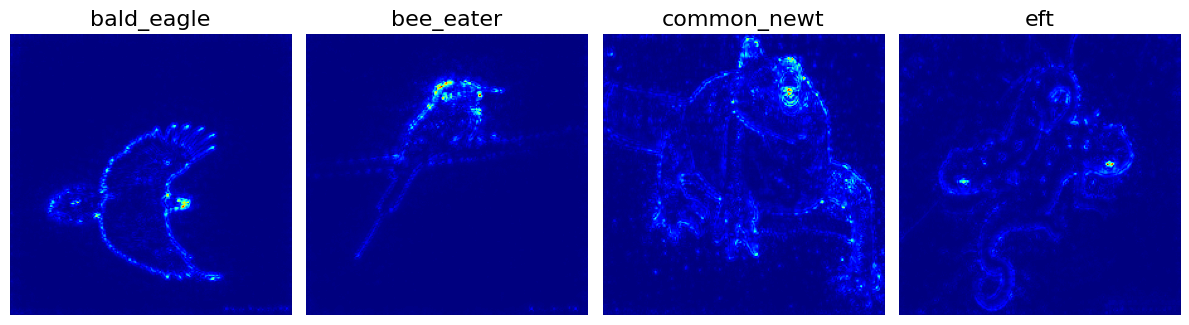

CPU times: user 1.29 s, sys: 726 ms, total: 2.02 s
Wall time: 1.92 s


In [32]:
%%time
from tensorflow.keras import backend as K
from tf_keras_vis.saliency import Saliency

saliency = Saliency(model, model_modifier=guided, clone=True)
saliency_map = saliency(score, X)

f, ax = plt.subplots(nrows=1, ncols=4, figsize=(12, 4))
for i, title in enumerate(image_titles):
    ax[i].set_title(title, fontsize=16)
    ax[i].imshow(saliency_map[i], cmap='jet')
    ax[i].axis('off')
plt.tight_layout()
plt.show()

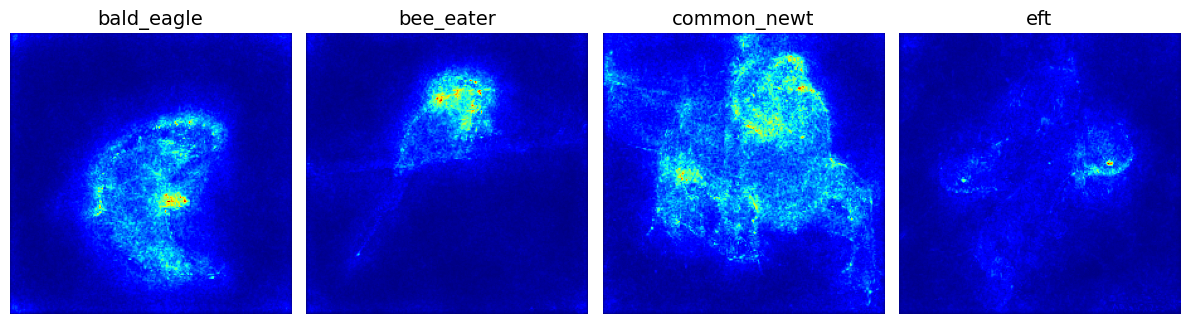

CPU times: user 2.5 s, sys: 154 ms, total: 2.65 s
Wall time: 3.83 s


In [26]:
%%time

saliency_map = saliency(score, X, smooth_samples=20, smooth_noise=0.20)

f, ax = plt.subplots(nrows=1, ncols=4, figsize=(12, 4))
for i, title in enumerate(image_titles):
    ax[i].set_title(title, fontsize=14)
    ax[i].imshow(saliency_map[i], cmap='jet')
    ax[i].axis('off')
plt.tight_layout()
plt.savefig('images/smoothgrad.png')
plt.show()

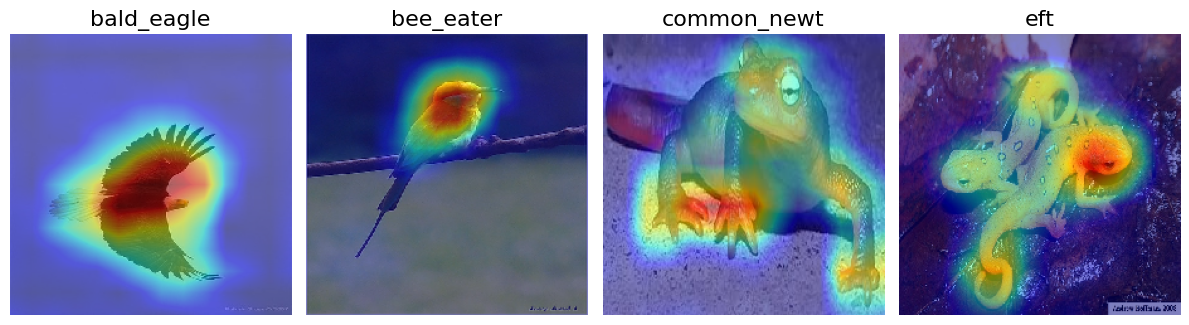

CPU times: user 1.63 s, sys: 800 ms, total: 2.43 s
Wall time: 2.65 s


In [33]:
%%time

from matplotlib import cm
from tf_keras_vis.gradcam import Gradcam

gradcam = Gradcam(model, model_modifier=guided, clone=True)

cam = gradcam(score, X, penultimate_layer=-1)

f, ax = plt.subplots(nrows=1, ncols=4, figsize=(12, 4))
for i, title in enumerate(image_titles):
    heatmap = np.uint8(cm.jet(cam[i])[..., :3] * 255)
    ax[i].set_title(title, fontsize=16)
    ax[i].imshow(images[i])
    ax[i].imshow(heatmap, cmap='jet', alpha=0.5) # overlay
    ax[i].axis('off')
plt.tight_layout()
plt.show()

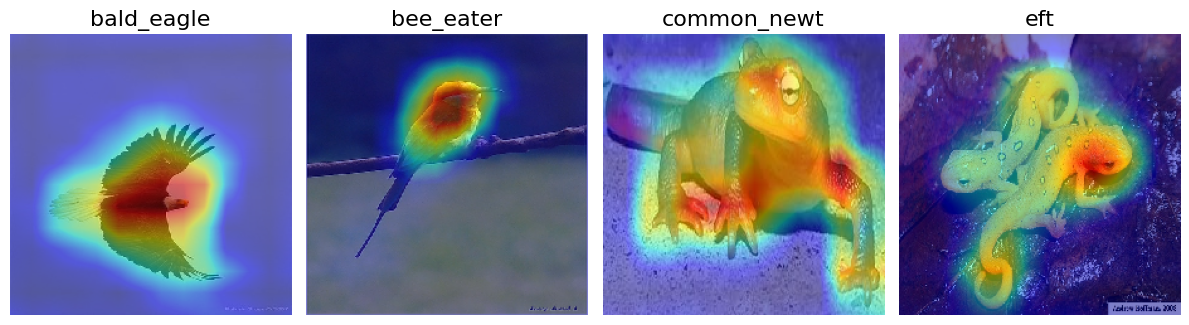

CPU times: user 1.93 s, sys: 769 ms, total: 2.7 s
Wall time: 3.27 s


In [34]:
%%time

from tf_keras_vis.gradcam_plus_plus import GradcamPlusPlus

gradcam = GradcamPlusPlus(model, model_modifier=guided, clone=True)

cam = gradcam(score, X, penultimate_layer=-1)

f, ax = plt.subplots(nrows=1, ncols=4, figsize=(12, 4))
for i, title in enumerate(image_titles):
    heatmap = np.uint8(cm.jet(cam[i])[..., :3] * 255)
    ax[i].set_title(title, fontsize=16)
    ax[i].imshow(images[i])
    ax[i].imshow(heatmap, cmap='jet', alpha=0.5)
    ax[i].axis('off')
plt.tight_layout()
plt.savefig('images/gradcam_plus_plus.png')
plt.show()